<a href="https://colab.research.google.com/github/Sreyas2403/StockAnalysis_Patterns-Indicators/blob/main/Assign3_Uptrend%26Downtrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nsepython

In [ ]:
!pip install nsetools

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=93ade47b1016a4e0aaf36fb848217d23c7e38167c420f0e1b2e2a7b230a36940
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
from nsepython import *
print(indices)


['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [ ]:
symbol = "SBIN"
series = "EQ"
start_date = "01-01-2023"
end_date ="31-12-2023"
print(equity_history(symbol,series,start_date,end_date))

                          _id CH_SYMBOL CH_SERIES CH_MARKET_TYPE  \
0    658c11ff3dcac5b895a9ab2a      SBIN        EQ              N   
1    658d637e55a5f96115c518a5      SBIN        EQ              N   
2    658eb4ff59ecfd0253b31b8f      SBIN        EQ              N   
3    655755ffe1720fcb41e49b03      SBIN        EQ              N   
4    655b4a7e3f0ac524236969fe      SBIN        EQ              N   
..                        ...       ...       ...            ...   
247  63e0ebfee9486e000641a74e      SBIN        EQ              N   
248  63e23d7e9029740006c92280      SBIN        EQ              N   
249  63e38edb77e63d0007d9b91b      SBIN        EQ              N   
250  63e4e0621df6cc0007b3d3dd      SBIN        EQ              N   
251  642835e7faf76300072ef1db      SBIN        EQ              N   

     CH_TRADE_HIGH_PRICE  CH_TRADE_LOW_PRICE  CH_OPENING_PRICE  \
0                 649.45              639.00            640.75   
1                 653.30              646.50       

In [ ]:
#code for List of Dates when RSI crossed Signal from below and 20<= RSI <=40 sbin
import nsepython
import pandas_ta as ta

symbol = input()
series = "EQ"
start_date = input()
end_date = input()

# Get equity history
history =  equity_history(symbol=symbol, series=series, start_date=start_date, end_date=end_date)

# Calculate RSI
history['RSI'] = ta.rsi(history['CH_CLOSING_PRICE'], length=14)

# Calculate RSI-based Moving Average (RSI MA)
rsi_ma_period = 9  # You can adjust this period as needed
history['RSI_MA'] = ta.sma(history['RSI'], length=rsi_ma_period)

# Identify dates of RSI crossovers above RSI-MA within RSI range (20 <= RSI <= 40)
rsi_crossovers = []
prev_rsi_above_ma = False  # Initialize to False

for index, row in history.iterrows():
  rsi = row['RSI']
  rsi_ma = row['RSI_MA']

  # Check for RSI crossing above RSI-MA within RSI range (bullish crossover)
  if rsi > rsi_ma and 20 <= rsi <= 40 and (prev_rsi_above_ma is None or not prev_rsi_above_ma):
    rsi_crossovers.append(row['mTIMESTAMP'])
    prev_rsi_above_ma = True
  else:
    prev_rsi_above_ma = False  # Reset if not a crossover

# Print results
print(history[['mTIMESTAMP', 'CH_CLOSING_PRICE', 'RSI', 'RSI_MA']])
print("\nList of Dates when RSI crossed above RSI-MA (20 <= RSI <= 40):", rsi_crossovers)


{'data': [{'_id': '642835e7faf76300072ef1db', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 557.25, 'CH_TRADE_LOW_PRICE': 546.5, 'CH_OPENING_PRICE': 546.5, 'CH_CLOSING_PRICE': 553.05, 'CH_LAST_TRADED_PRICE': 552.9, 'CH_PREVIOUS_CLS_PRICE': 550.8, 'CH_TOT_TRADED_QTY': 13824475, 'CH_TOT_TRADED_VAL': 7656154646.75, 'CH_52WEEK_HIGH_PRICE': 629.55, 'CH_52WEEK_LOW_PRICE': 425, 'CH_TOTAL_TRADES': 179516, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2023-02-10', 'TIMESTAMP': '2023-02-09T18:30:00.000Z', 'createdAt': '2023-04-01T13:47:19.650Z', 'updatedAt': '2023-04-01T13:47:19.650Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 553.81, 'mTIMESTAMP': '10-Feb-2023'}, {'_id': '63e4e0621df6cc0007b3d3dd', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 552, 'CH_TRADE_LOW_PRICE': 542.8, 'CH_OPENING_PRICE': 552, 'CH_CLOSING_PRICE': 550.8, 'CH_LAST_TRADED_PRICE': 551, 'CH_PREVIOUS_CLS_PRICE': 549.75, 'CH_TOT_TRADED_QTY': 15061047,

In [ ]:
#THOMAS COOK
#code for List of Dates when RSI crossed Signal from below and 20<= RSI <=40
import nsepython
import pandas_ta as ta

symbol = "THOMASCOOK"
series = "EQ"
start_date = "01-01-2023"
end_date = "31-12-2023"

# Get equity history
history =  equity_history(symbol=symbol, series=series, start_date=start_date, end_date=end_date)

# Calculate RSI
history['RSI'] = ta.rsi(history['CH_CLOSING_PRICE'], length=14)

# Calculate RSI-based Moving Average (RSI MA)
rsi_ma_period = 9  #
history['RSI_MA'] = ta.sma(history['RSI'], length=rsi_ma_period)

# Identify dates of RSI crossovers above RSI-MA within RSI range (20 <= RSI <= 40)
rsi_crossovers = []
prev_rsi_above_ma = False  # Initialize to False

for index, row in history.iterrows():
  rsi = row['RSI']
  rsi_ma = row['RSI_MA']

  # Check for RSI crossing above RSI-MA within RSI range (bullish crossover)
  if rsi > rsi_ma and 20 <= rsi <= 40 and (prev_rsi_above_ma is None or not prev_rsi_above_ma):
    rsi_crossovers.append(row['mTIMESTAMP'])
    prev_rsi_above_ma = True
  else:
    prev_rsi_above_ma = False  # Reset if not a crossover

# Print results
print(history[['mTIMESTAMP', 'CH_CLOSING_PRICE', 'RSI', 'RSI_MA']])
print("\nList of Dates when RSI crossed above RSI-MA (20 <= RSI <= 40):", rsi_crossovers)


      mTIMESTAMP  CH_CLOSING_PRICE        RSI     RSI_MA
0    27-Dec-2023            137.85        NaN        NaN
1    28-Dec-2023            137.60        NaN        NaN
2    29-Dec-2023            135.85        NaN        NaN
3    17-Nov-2023            154.85        NaN        NaN
4    20-Nov-2023            157.40        NaN        NaN
..           ...               ...        ...        ...
190  06-Feb-2023             67.45  43.666322  51.574476
191  07-Feb-2023             66.55  41.392382  49.878351
192  08-Feb-2023             69.20  49.698555  49.417962
193  09-Feb-2023             68.10  46.737517  49.280587
194  10-Feb-2023             67.00  43.919507  49.211317

[195 rows x 4 columns]

List of Dates when RSI crossed above RSI-MA (20 <= RSI <= 40): ['01-Aug-2023', '03-Aug-2023', '07-Aug-2023', '21-Jun-2023', '23-Jun-2023', '30-Jun-2023', '06-Jul-2023', '12-Jul-2023', '12-May-2023', '30-May-2023', '01-Jun-2023', '31-Mar-2023']


In [ ]:
#STARCEMENT
#THOMAS COOK
#code for List of Dates when RSI crossed Signal from below and 20<= RSI <=40
import nsepython
import pandas_ta as ta

symbol = "STARCEMENT"
series = "EQ"
start_date = "01-01-2023"
end_date = "31-12-2023"

# Get equity history
history =  equity_history(symbol=symbol, series=series, start_date=start_date, end_date=end_date)

# Calculate RSI
history['RSI'] = ta.rsi(history['CH_CLOSING_PRICE'], length=14)

# Calculate RSI-based Moving Average (RSI MA)
rsi_ma_period = 9  #
history['RSI_MA'] = ta.sma(history['RSI'], length=rsi_ma_period)

# Identify dates of RSI crossovers above RSI-MA within RSI range (20 <= RSI <= 40)
rsi_crossovers = []
prev_rsi_above_ma = False  # Initialize to False

for index, row in history.iterrows():
  rsi = row['RSI']
  rsi_ma = row['RSI_MA']

  # Check for RSI crossing above RSI-MA within RSI range (bullish crossover)
  if rsi > rsi_ma and 20 <= rsi <= 40 and (prev_rsi_above_ma is None or not prev_rsi_above_ma):
    rsi_crossovers.append(row['mTIMESTAMP'])
    prev_rsi_above_ma = True
  else:
    prev_rsi_above_ma = False  # Reset if not a crossover

# Print results
print(history[['mTIMESTAMP', 'CH_CLOSING_PRICE', 'RSI', 'RSI_MA']])
print("\nList of Dates when RSI crossed above RSI-MA (20 <= RSI <= 40):", rsi_crossovers)


      mTIMESTAMP  CH_CLOSING_PRICE        RSI     RSI_MA
0    27-Dec-2023            176.00        NaN        NaN
1    28-Dec-2023            174.40        NaN        NaN
2    29-Dec-2023            176.40        NaN        NaN
3    17-Nov-2023            164.90        NaN        NaN
4    20-Nov-2023            167.70        NaN        NaN
..           ...               ...        ...        ...
247  06-Feb-2023            114.30  54.999554  43.867888
248  07-Feb-2023            112.50  51.250596  44.285453
249  08-Feb-2023            114.10  54.236674  45.235589
250  09-Feb-2023            113.50  52.927406  47.652338
251  10-Feb-2023            112.85  51.477631  49.330177

[252 rows x 4 columns]

List of Dates when RSI crossed above RSI-MA (20 <= RSI <= 40): ['01-Aug-2023', '28-Jun-2023', '11-May-2023', '15-May-2023', '17-May-2023', '23-May-2023', '05-Apr-2023']


In [ ]:
#ADANIPOWER
#THOMAS COOK
#code for List of Dates when RSI crossed Signal from below and 20<= RSI <=40
import nsepython
import pandas_ta as ta

symbol = "ADANIPOWER"
series = "EQ"
start_date = "01-01-2023"
end_date = "31-12-2023"

# Get equity history
history =  equity_history(symbol=symbol, series=series, start_date=start_date, end_date=end_date)

# Calculate RSI
history['RSI'] = ta.rsi(history['CH_CLOSING_PRICE'], length=14)

# Calculate RSI-based Moving Average (RSI MA)
rsi_ma_period = 9  #
history['RSI_MA'] = ta.sma(history['RSI'], length=rsi_ma_period)

# Identify dates of RSI crossovers above RSI-MA within RSI range (20 <= RSI <= 40)
rsi_crossovers = []
prev_rsi_above_ma = False  # Initialize to False

for index, row in history.iterrows():
  rsi = row['RSI']
  rsi_ma = row['RSI_MA']

  # Check for RSI crossing above RSI-MA within RSI range (bullish crossover)
  if rsi > rsi_ma and 20 <= rsi <= 40 and (prev_rsi_above_ma is None or not prev_rsi_above_ma):
    rsi_crossovers.append(row['mTIMESTAMP'])
    prev_rsi_above_ma = True
  else:
    prev_rsi_above_ma = False  # Reset if not a crossover

# Print results
print(history[['mTIMESTAMP', 'CH_CLOSING_PRICE', 'RSI', 'RSI_MA']])
print("\nList of Dates when RSI crossed above RSI-MA (20 <= RSI <= 40):", rsi_crossovers)


      mTIMESTAMP  CH_CLOSING_PRICE        RSI     RSI_MA
0    17-Nov-2023            387.30        NaN        NaN
1    20-Nov-2023            389.95        NaN        NaN
2    21-Nov-2023            392.50        NaN        NaN
3    22-Nov-2023            387.20        NaN        NaN
4    23-Nov-2023            381.70        NaN        NaN
..           ...               ...        ...        ...
235  06-Feb-2023            182.35  26.527417  40.439561
236  07-Feb-2023            173.25  24.581324  36.280527
237  08-Feb-2023            181.90  29.849483  33.623481
238  09-Feb-2023            172.80  27.660465  31.442848
239  10-Feb-2023            164.20  25.739356  29.625360

[240 rows x 4 columns]

List of Dates when RSI crossed above RSI-MA (20 <= RSI <= 40): ['19-Oct-2023', '26-Oct-2023', '28-Jul-2023', '01-Aug-2023', '03-Aug-2023', '07-Aug-2023', '09-Aug-2023', '27-Jun-2023', '30-Jun-2023', '14-Jul-2023', '20-Jul-2023', '04-May-2023', '08-May-2023', '03-Apr-2023', '06-Apr-2023', '1

In [ ]:
#code for List of Dates when MACD crossed Signal from below and MACD < 0
#code for List of Dates when MACD crossed Signal from below and MACD > 0
#code for  List of Dates when MACD crossed Signal from above and MACD > 0 sbin
from nsetools import Nse
import pandas as pd
start_date = input()
end_date = input()
series = 'EQ'
symbol = input() #here we take SBIN


def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['CH_CLOSING_PRICE'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['CH_CLOSING_PRICE'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

def calculate_macd_signals(symbol, start_date, end_date):
    nse = Nse()
    equity_data = equity_history(symbol, series, start_date, end_date)

    # Convert data to DataFrame and sort by date
    data = pd.DataFrame(equity_data)
    data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
    data = data.sort_values(by='mTIMESTAMP')

    # Calculate MACD and Signal lines
    macd_line, signal_line = calculate_macd(data)

    # List of Dates when MACD just crossed MACD Signal from below and MACD < 0
    crossover_below_macd = data[(macd_line.shift(1) < signal_line.shift(1)) & (macd_line > signal_line) & (macd_line < 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed MACD Signal from below and MACD > 0
    crossover_above_macd = data[(macd_line.shift(1) < signal_line.shift(1)) & (macd_line > signal_line) & (macd_line > 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed MACD Signal from above and MACD > 0
    crossover_above_signal = data[(macd_line.shift(1) > signal_line.shift(1)) & (macd_line < signal_line) & (macd_line > 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed 0-Line from below and RSI >= 40

    return crossover_below_macd, crossover_above_macd, crossover_above_signal,


crossover_below_macd, crossover_above_macd, crossover_above_signal = calculate_macd_signals(symbol, start_date, end_date)

print("Dates when MACD just crossed MACD Signal from below and MACD < 0:")
print(crossover_below_macd)

print("Dates when MACD crossed MACD Signal from below and MACD > 0:")
print(crossover_above_macd)

print("Dates when MACD crossed MACD Signal from above and MACD > 0:")
print(crossover_above_signal)



01-01-2023
31-12-2023
{'data': [{'_id': '642835e7faf76300072ef1db', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 557.25, 'CH_TRADE_LOW_PRICE': 546.5, 'CH_OPENING_PRICE': 546.5, 'CH_CLOSING_PRICE': 553.05, 'CH_LAST_TRADED_PRICE': 552.9, 'CH_PREVIOUS_CLS_PRICE': 550.8, 'CH_TOT_TRADED_QTY': 13824475, 'CH_TOT_TRADED_VAL': 7656154646.75, 'CH_52WEEK_HIGH_PRICE': 629.55, 'CH_52WEEK_LOW_PRICE': 425, 'CH_TOTAL_TRADES': 179516, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2023-02-10', 'TIMESTAMP': '2023-02-09T18:30:00.000Z', 'createdAt': '2023-04-01T13:47:19.650Z', 'updatedAt': '2023-04-01T13:47:19.650Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 553.81, 'mTIMESTAMP': '10-Feb-2023'}, {'_id': '63e4e0621df6cc0007b3d3dd', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 552, 'CH_TRADE_LOW_PRICE': 542.8, 'CH_OPENING_PRICE': 552, 'CH_CLOSING_PRICE': 550.8, 'CH_LAST_TRADED_PRICE': 551, 'CH_PREVIOUS_CLS_PRICE': 549.75, 'CH_TOT_

In [ ]:
#ADANI POWER
#code for List of Dates when MACD crossed Signal from below and MACD < 0
#code for List of Dates when MACD crossed Signal from below and MACD > 0
#code for  List of Dates when MACD crossed Signal from above and MACD > 0
from nsetools import Nse
import pandas as pd
start_date = input()
end_date = input()
series = 'EQ'
symbol = 'ADANIPOWER'


def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['CH_CLOSING_PRICE'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['CH_CLOSING_PRICE'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

def calculate_macd_signals(symbol, start_date, end_date):
    nse = Nse()
    equity_data = equity_history(symbol, series, start_date, end_date)

    # Convert data to DataFrame and sort by date
    data = pd.DataFrame(equity_data)
    data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
    data = data.sort_values(by='mTIMESTAMP')

    # Calculate MACD and Signal lines
    macd_line, signal_line = calculate_macd(data)

    # List of Dates when MACD just crossed MACD Signal from below and MACD < 0
    crossover_below_macd = data[(macd_line.shift(1) < signal_line.shift(1)) & (macd_line > signal_line) & (macd_line < 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed MACD Signal from below and MACD > 0
    crossover_above_macd = data[(macd_line.shift(1) < signal_line.shift(1)) & (macd_line > signal_line) & (macd_line > 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed MACD Signal from above and MACD > 0
    crossover_above_signal = data[(macd_line.shift(1) > signal_line.shift(1)) & (macd_line < signal_line) & (macd_line > 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed 0-Line from below and RSI >= 40

    return crossover_below_macd, crossover_above_macd, crossover_above_signal,


crossover_below_macd, crossover_above_macd, crossover_above_signal = calculate_macd_signals(symbol, start_date, end_date)

print("Dates when MACD just crossed MACD Signal from below and MACD < 0:")
print(crossover_below_macd)

print("Dates when MACD crossed MACD Signal from below and MACD > 0:")
print(crossover_above_macd)

print("Dates when MACD crossed MACD Signal from above and MACD > 0:")
print(crossover_above_signal)



01-01-2023
31-12-2023
Dates when MACD just crossed MACD Signal from below and MACD < 0:
190   2023-02-21
77    2023-07-25
32    2023-10-30
Name: mTIMESTAMP, dtype: datetime64[ns]
Dates when MACD crossed MACD Signal from below and MACD > 0:
170   2023-04-11
177   2023-04-21
145   2023-05-23
156   2023-06-07
51    2023-09-04
6     2023-11-28
Name: mTIMESTAMP, dtype: datetime64[ns]
Dates when MACD crossed MACD Signal from above and MACD > 0:
163   2023-03-28
172   2023-04-13
141   2023-05-17
151   2023-05-31
104   2023-06-14
50    2023-09-01
62    2023-09-20
1     2023-11-20
Name: mTIMESTAMP, dtype: datetime64[ns]


In [ ]:
#THOMAS COOK
#code for List of Dates when MACD crossed Signal from below and MACD < 0
#code for List of Dates when MACD crossed Signal from below and MACD > 0
#code for  List of Dates when MACD crossed Signal from above and MACD > 0
from nsetools import Nse
import pandas as pd
start_date = input()
end_date = input()
series = 'EQ'
symbol = 'THOMASCOOK'


def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['CH_CLOSING_PRICE'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['CH_CLOSING_PRICE'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

def calculate_macd_signals(symbol, start_date, end_date):
    nse = Nse()
    equity_data = equity_history(symbol, series, start_date, end_date)

    # Convert data to DataFrame and sort by date
    data = pd.DataFrame(equity_data)
    data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
    data = data.sort_values(by='mTIMESTAMP')

    # Calculate MACD and Signal lines
    macd_line, signal_line = calculate_macd(data)

    # List of Dates when MACD just crossed MACD Signal from below and MACD < 0
    crossover_below_macd = data[(macd_line.shift(1) < signal_line.shift(1)) & (macd_line > signal_line) & (macd_line < 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed MACD Signal from below and MACD > 0
    crossover_above_macd = data[(macd_line.shift(1) < signal_line.shift(1)) & (macd_line > signal_line) & (macd_line > 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed MACD Signal from above and MACD > 0
    crossover_above_signal = data[(macd_line.shift(1) > signal_line.shift(1)) & (macd_line < signal_line) & (macd_line > 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed 0-Line from below and RSI >= 40

    return crossover_below_macd, crossover_above_macd, crossover_above_signal,


crossover_below_macd, crossover_above_macd, crossover_above_signal = calculate_macd_signals(symbol, start_date, end_date)

print("Dates when MACD just crossed MACD Signal from below and MACD < 0:")
print(crossover_below_macd)

print("Dates when MACD crossed MACD Signal from below and MACD > 0:")
print(crossover_above_macd)

print("Dates when MACD crossed MACD Signal from above and MACD > 0:")
print(crossover_above_signal)



01-01-2023
31-12-2023
Dates when MACD just crossed MACD Signal from below and MACD < 0:
155   2023-03-08
121   2023-04-03
Name: mTIMESTAMP, dtype: datetime64[ns]
Dates when MACD crossed MACD Signal from below and MACD > 0:
93    2023-05-12
109   2023-06-05
71    2023-07-03
81    2023-07-17
50    2023-08-04
Name: mTIMESTAMP, dtype: datetime64[ns]
Dates when MACD crossed MACD Signal from above and MACD > 0:
178   2023-01-18
92    2023-05-11
98    2023-05-19
69    2023-06-28
74    2023-07-06
44    2023-07-27
7     2023-11-23
Name: mTIMESTAMP, dtype: datetime64[ns]


In [ ]:
#STARCEMENT
#code for List of Dates when MACD crossed Signal from below and MACD < 0
#code for List of Dates when MACD crossed Signal from below and MACD > 0
#code for  List of Dates when MACD crossed Signal from above and MACD > 0
from nsetools import Nse
import pandas as pd
start_date = input()
end_date = input()
series = 'EQ'
symbol = 'STARCEMENT'


def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['CH_CLOSING_PRICE'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['CH_CLOSING_PRICE'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

def calculate_macd_signals(symbol, start_date, end_date):
    nse = Nse()
    equity_data = equity_history(symbol, series, start_date, end_date)

    # Convert data to DataFrame and sort by date
    data = pd.DataFrame(equity_data)
    data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
    data = data.sort_values(by='mTIMESTAMP')

    # Calculate MACD and Signal lines
    macd_line, signal_line = calculate_macd(data)

    # List of Dates when MACD just crossed MACD Signal from below and MACD < 0
    crossover_below_macd = data[(macd_line.shift(1) < signal_line.shift(1)) & (macd_line > signal_line) & (macd_line < 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed MACD Signal from below and MACD > 0
    crossover_above_macd = data[(macd_line.shift(1) < signal_line.shift(1)) & (macd_line > signal_line) & (macd_line > 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed MACD Signal from above and MACD > 0
    crossover_above_signal = data[(macd_line.shift(1) > signal_line.shift(1)) & (macd_line < signal_line) & (macd_line > 0)]['mTIMESTAMP']

    # List of Dates when MACD crossed 0-Line from below and RSI >= 40

    return crossover_below_macd, crossover_above_macd, crossover_above_signal,


crossover_below_macd, crossover_above_macd, crossover_above_signal = calculate_macd_signals(symbol, start_date, end_date)

print("Dates when MACD just crossed MACD Signal from below and MACD < 0:")
print(crossover_below_macd)

print("Dates when MACD crossed MACD Signal from below and MACD > 0:")
print(crossover_above_macd)

print("Dates when MACD crossed MACD Signal from above and MACD > 0:")
print(crossover_above_signal)



01-01-2023
31-12-2023
Dates when MACD just crossed MACD Signal from below and MACD < 0:
248   2023-02-07
200   2023-02-17
205   2023-02-24
209   2023-03-02
172   2023-03-23
83    2023-10-04
51    2023-11-08
Name: mTIMESTAMP, dtype: datetime64[ns]
Dates when MACD crossed MACD Signal from below and MACD > 0:
227   2023-01-06
194   2023-04-28
159   2023-05-25
95    2023-08-02
56    2023-11-15
13    2023-12-04
21    2023-12-14
29    2023-12-27
Name: mTIMESTAMP, dtype: datetime64[ns]
Dates when MACD crossed MACD Signal from above and MACD > 0:
225   2023-01-04
238   2023-01-23
189   2023-04-21
155   2023-05-19
119   2023-06-19
105   2023-08-17
40    2023-10-23
12    2023-12-01
16    2023-12-07
28    2023-12-26
1     2023-12-28
Name: mTIMESTAMP, dtype: datetime64[ns]


In [ ]:
#SBIN
import pandas as pd
import numpy as np
import nsepython as nse
import matplotlib.pyplot as plt
import pandas_ta as ta

# Parameters
symbol = input()
series = "EQ"
start_date = input()
end_date = input()

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert the equity data to a DataFrame
equity_df = pd.DataFrame(equity_data)

# Convert the 'date' column to datetime format
equity_df['mTIMESTAMP'] = pd.to_datetime(equity_df['mTIMESTAMP'])

# Calculate MACD and its signal line
macd_df = ta.macd(equity_df['CH_CLOSING_PRICE'], fast=12, slow=26, signal=9)
equity_df['MACD'] = macd_df['MACD_12_26_9']
equity_df['Signal_Line'] = macd_df['MACDs_12_26_9']

# Calculate RSI
equity_df['RSI'] = ta.rsi(equity_df['CH_CLOSING_PRICE'], length=14)

# Identify the dates when MACD crossed the 0-line from below and RSI >= 40
crossing_dates = []
for i in range(1, len(equity_df)):
    if equity_df['MACD'].iloc[i] > 0 and equity_df['MACD'].iloc[i-1] <= 0 and equity_df['RSI'].iloc[i] >= 40:
        crossing_dates.append(equity_df['mTIMESTAMP'].iloc[i])

# Print the list of dates
print("List of Dates when MACD crossed the 0-Line from below and RSI >= 40:")
print(crossing_dates)

#  Save the results to an Excel file
output_file = 'SBIN_MACD_RSI_crossing_dates.xlsx'
crossing_dates_df = pd.DataFrame(crossing_dates, columns=['mTIMESTAMP'])
crossing_dates_df.to_excel(output_file, index=False)




SBIN
01-01-2023
31-12-2023
{'data': [{'_id': '642835e7faf76300072ef1db', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 557.25, 'CH_TRADE_LOW_PRICE': 546.5, 'CH_OPENING_PRICE': 546.5, 'CH_CLOSING_PRICE': 553.05, 'CH_LAST_TRADED_PRICE': 552.9, 'CH_PREVIOUS_CLS_PRICE': 550.8, 'CH_TOT_TRADED_QTY': 13824475, 'CH_TOT_TRADED_VAL': 7656154646.75, 'CH_52WEEK_HIGH_PRICE': 629.55, 'CH_52WEEK_LOW_PRICE': 425, 'CH_TOTAL_TRADES': 179516, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2023-02-10', 'TIMESTAMP': '2023-02-09T18:30:00.000Z', 'createdAt': '2023-04-01T13:47:19.650Z', 'updatedAt': '2023-04-01T13:47:19.650Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 553.81, 'mTIMESTAMP': '10-Feb-2023'}, {'_id': '63e4e0621df6cc0007b3d3dd', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 552, 'CH_TRADE_LOW_PRICE': 542.8, 'CH_OPENING_PRICE': 552, 'CH_CLOSING_PRICE': 550.8, 'CH_LAST_TRADED_PRICE': 551, 'CH_PREVIOUS_CLS_PRICE': 549.75, 'CH

In [ ]:
#THOMAS COOK
import pandas as pd
import numpy as np
import nsepython as nse
import matplotlib.pyplot as plt
import pandas_ta as ta

# Parameters
symbol = "THOMASCOOK"
series = "EQ"
start_date = "01-01-2023"
end_date = "31-12-2023"

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert the equity data to a DataFrame
equity_df = pd.DataFrame(equity_data)

# Convert the 'date' column to datetime format
equity_df['mTIMESTAMP'] = pd.to_datetime(equity_df['mTIMESTAMP'])

# Calculate MACD and its signal line
macd_df = ta.macd(equity_df['CH_CLOSING_PRICE'], fast=12, slow=26, signal=9)
equity_df['MACD'] = macd_df['MACD_12_26_9']
equity_df['Signal_Line'] = macd_df['MACDs_12_26_9']

# Calculate RSI
equity_df['RSI'] = ta.rsi(equity_df['CH_CLOSING_PRICE'], length=14)

# Identify the dates when MACD crossed the 0-line from below and RSI >= 40
crossing_dates = []
for i in range(1, len(equity_df)):
    if equity_df['MACD'].iloc[i] > 0 and equity_df['MACD'].iloc[i-1] <= 0 and equity_df['RSI'].iloc[i] >= 40:
        crossing_dates.append(equity_df['mTIMESTAMP'].iloc[i])

# Print the list of dates
print("List of Dates when MACD crossed the 0-Line from below and RSI >= 40:")
print(crossing_dates)

#  Save the results to an Excel file
output_file = 'THOMASCOOK_MACD_RSI_crossing_dates.xlsx'
crossing_dates_df = pd.DataFrame(crossing_dates, columns=['mTIMESTAMP'])
crossing_dates_df.to_excel(output_file, index=False)



{'data': [{'_id': '642835e7faf76300072eef6c', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 68.35, 'CH_TRADE_LOW_PRICE': 66.1, 'CH_OPENING_PRICE': 67.95, 'CH_CLOSING_PRICE': 67, 'CH_LAST_TRADED_PRICE': 67.45, 'CH_PREVIOUS_CLS_PRICE': 68.1, 'CH_TOT_TRADED_QTY': 273318, 'CH_TOT_TRADED_VAL': 18429456.2, 'CH_52WEEK_HIGH_PRICE': 91.3, 'CH_52WEEK_LOW_PRICE': 54.2, 'CH_TOTAL_TRADES': 3052, 'CH_ISIN': 'INE332A01027', 'CH_TIMESTAMP': '2023-02-10', 'TIMESTAMP': '2023-02-09T18:30:00.000Z', 'createdAt': '2023-04-01T13:47:19.039Z', 'updatedAt': '2023-04-01T13:47:19.039Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 67.43, 'mTIMESTAMP': '10-Feb-2023'}, {'_id': '63e4e0621df6cc0007b3d16f', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 69.5, 'CH_TRADE_LOW_PRICE': 67.65, 'CH_OPENING_PRICE': 69.5, 'CH_CLOSING_PRICE': 68.1, 'CH_LAST_TRADED_PRICE': 68, 'CH_PREVIOUS_CLS_PRICE': 69.2, 'CH_TOT_TRADED_QTY': 193822, 'CH_TOT

In [ ]:
# STARCEMENT
import pandas as pd
import numpy as np
import nsepython as nse
import pandas_ta as ta

# Parameters
symbol = "STARCEMENT"
series = "EQ"
start_date = "01-01-2023"
end_date = "31-12-2023"

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert the equity data to a DataFrame
equity_df = pd.DataFrame(equity_data)

# Convert the 'date' column to datetime format
equity_df['date'] = pd.to_datetime(equity_df['mTIMESTAMP'])

# Calculate MACD and its signal line
macd_df = ta.macd(equity_df['CH_CLOSING_PRICE'], fast=12, slow=26, signal=9)
equity_df['MACD'] = macd_df['MACD_12_26_9']
equity_df['Signal_Line'] = macd_df['MACDs_12_26_9']

# Calculate RSI
equity_df['RSI'] = ta.rsi(equity_df['CH_CLOSING_PRICE'], length=14)

# Identify the dates when MACD crossed the 0-line from below and RSI >= 40
crossing_dates = []
for i in range(1, len(equity_df)):
    if equity_df['MACD'].iloc[i] > 0 and equity_df['MACD'].iloc[i-1] <= 0 and equity_df['RSI'].iloc[i] >= 40:
        crossing_dates.append(equity_df['mTIMESTAMP'].iloc[i])

# Print the list of dates
print("List of Dates when MACD crossed the 0-Line from below and RSI >= 40:")
print(crossing_dates)

#  Save the results to an Excel file
output_file = 'STARCEMENT_MACD_RSI_crossing_dates.xlsx'
crossing_dates_df = pd.DataFrame(crossing_dates, columns=['mTIMESTAMP'])
crossing_dates_df.to_excel(output_file, index=False)



List of Dates when MACD crossed the 0-Line from below and RSI >= 40:
['18-Oct-2023', '04-Aug-2023', '05-Jun-2023', '06-Jan-2023']


In [ ]:
import pandas as pd
import numpy as np
import nsepython as nse
import matplotlib.pyplot as plt
import pandas_ta as ta

# Parameters
symbol = "ADANIPOWER"
series = "EQ"
start_date = "01-01-2023"
end_date = "31-12-2023"

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert the equity data to a DataFrame
equity_df = pd.DataFrame(equity_data)

# Convert the 'date' column to datetime format
equity_df['date'] = pd.to_datetime(equity_df['mTIMESTAMP'])

# Calculate MACD and its signal line
macd_df = ta.macd(equity_df['CH_CLOSING_PRICE'], fast=12, slow=26, signal=9)
equity_df['MACD'] = macd_df['MACD_12_26_9']
equity_df['Signal_Line'] = macd_df['MACDs_12_26_9']

# Calculate RSI
equity_df['RSI'] = ta.rsi(equity_df['CH_CLOSING_PRICE'], length=14)

# Identify the dates when MACD crossed the 0-line from below and RSI >= 40
crossing_dates = []
for i in range(1, len(equity_df)):
    if equity_df['MACD'].iloc[i] > 0 and equity_df['MACD'].iloc[i-1] <= 0 and equity_df['RSI'].iloc[i] >= 40:
        crossing_dates.append(equity_df['mTIMESTAMP'].iloc[i])

# Print the list of dates
print("List of Dates when MACD crossed the 0-Line from below and RSI >= 40:")
print(crossing_dates)

#  Save the results to an Excel file
output_file = 'ADANIPOWER_MACD_RSI_crossing_dates.xlsx'
crossing_dates_df = pd.DataFrame(crossing_dates, columns=['mTIMESTAMP'])
crossing_dates_df.to_excel(output_file, index=False)



List of Dates when MACD crossed the 0-Line from below and RSI >= 40:
['21-Sep-2023', '23-Aug-2023', '25-May-2023', '13-Mar-2023']


In [ ]:
import nsepython
import pandas as pd

symbol = "SBIN"
series = "EQ"
start_date = "01-01-2023"
end_date = "31-12-2023"

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert data to DataFrame and sort by date
data = pd.DataFrame(equity_data)
data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
data = data.sort_values(by='mTIMESTAMP')

# Calculate uptrends
data['CH_PREVIOUS_CLS_PRICE'] = data['CH_CLOSING_PRICE'].shift(1)
data['trend'] = data.apply(lambda row: 'Uptrend' if row['CH_CLOSING_PRICE'] > row['CH_PREVIOUS_CLS_PRICE'] else 'Downtrend', axis=1)

# Initialize variables for tracking consecutive days and uptrend dates
consecutive_days = 1
prev_trend = None
uptrend_dates = []

# Loop through data to identify consecutive days in each uptrend
for index, row in data.iterrows():
    if row['trend'] == 'Uptrend':
        if prev_trend == 'Uptrend':
            consecutive_days += 1
        else:
            if consecutive_days > 1:
                uptrend_dates.append((row['mTIMESTAMP'] - pd.Timedelta(days=consecutive_days - 1)).date())
            consecutive_days = 1
    prev_trend = row['trend']

# Print list of dates when price was in an uptrend
print("Uptrend Dates:")
print(uptrend_dates)

# Print number of consecutive days for each uptrend period
print("Number of Consecutive Days for Each Uptrend:")
for date in uptrend_dates:
    consecutive_days = (data['mTIMESTAMP'] >= pd.Timestamp(date)).sum()
    print(f"{date}: {consecutive_days} consecutive days")


{'data': [{'_id': '642835e7faf76300072ef1db', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 557.25, 'CH_TRADE_LOW_PRICE': 546.5, 'CH_OPENING_PRICE': 546.5, 'CH_CLOSING_PRICE': 553.05, 'CH_LAST_TRADED_PRICE': 552.9, 'CH_PREVIOUS_CLS_PRICE': 550.8, 'CH_TOT_TRADED_QTY': 13824475, 'CH_TOT_TRADED_VAL': 7656154646.75, 'CH_52WEEK_HIGH_PRICE': 629.55, 'CH_52WEEK_LOW_PRICE': 425, 'CH_TOTAL_TRADES': 179516, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2023-02-10', 'TIMESTAMP': '2023-02-09T18:30:00.000Z', 'createdAt': '2023-04-01T13:47:19.650Z', 'updatedAt': '2023-04-01T13:47:19.650Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 553.81, 'mTIMESTAMP': '10-Feb-2023'}, {'_id': '63e4e0621df6cc0007b3d3dd', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 552, 'CH_TRADE_LOW_PRICE': 542.8, 'CH_OPENING_PRICE': 552, 'CH_CLOSING_PRICE': 550.8, 'CH_LAST_TRADED_PRICE': 551, 'CH_PREVIOUS_CLS_PRICE': 549.75, 'CH_TOT_TRADED_QTY': 15061047,

In [ ]:
import nsepython
import pandas as pd

symbol = "SBIN"
series = "EQ"
start_date = "01-01-2023"
end_date = "31-12-2023"

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert data to DataFrame and sort by date
data = pd.DataFrame(equity_data)
data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
data = data.sort_values(by='mTIMESTAMP')

# Calculate uptrends
data['CH_PREVIOUS_CLS_PRICE'] = data['CH_CLOSING_PRICE'].shift(1)
data['trend'] = data.apply(lambda row: 'Uptrend' if row['CH_CLOSING_PRICE'] > row['CH_PREVIOUS_CLS_PRICE'] else 'Downtrend', axis=1)

# Initialize variables for tracking consecutive days and uptrend dates
consecutive_days = 1
prev_trend = None
uptrend_dates = []

# Loop through data to identify consecutive days in each uptrend
for index, row in data.iterrows():
    if row['trend'] == 'Uptrend':
        if prev_trend == 'Uptrend':
            consecutive_days += 1
        else:
            if consecutive_days > 1:
                uptrend_dates.append((row['mTIMESTAMP'] - pd.Timedelta(days=consecutive_days - 1)).date())
            consecutive_days = 1
    prev_trend = row['trend']

# Print list of dates when price was in an uptrend
print("Uptrend Dates:")
print(uptrend_dates)

# Print number of consecutive days for each uptrend period
print("Number of Consecutive Days for Each Uptrend:")
for date in uptrend_dates:
    consecutive_days = (data['mTIMESTAMP'] >= pd.Timestamp(date)).sum()
    print(f"{date}: {consecutive_days} consecutive days")


Uptrend Dates:
[datetime.date(2023, 1, 19), datetime.date(2023, 1, 30), datetime.date(2023, 2, 8), datetime.date(2023, 2, 22), datetime.date(2023, 2, 27), datetime.date(2023, 3, 14), datetime.date(2023, 3, 20), datetime.date(2023, 4, 4), datetime.date(2023, 4, 18), datetime.date(2023, 4, 26), datetime.date(2023, 5, 16), datetime.date(2023, 5, 23), datetime.date(2023, 5, 31), datetime.date(2023, 6, 6), datetime.date(2023, 7, 4), datetime.date(2023, 7, 20), datetime.date(2023, 7, 25), datetime.date(2023, 7, 30), datetime.date(2023, 8, 10), datetime.date(2023, 8, 21), datetime.date(2023, 8, 27), datetime.date(2023, 8, 31), datetime.date(2023, 9, 6), datetime.date(2023, 9, 11), datetime.date(2023, 9, 19), datetime.date(2023, 10, 3), datetime.date(2023, 10, 9), datetime.date(2023, 11, 2), datetime.date(2023, 11, 9), datetime.date(2023, 11, 17), datetime.date(2023, 11, 28), datetime.date(2023, 12, 7), datetime.date(2023, 12, 17), datetime.date(2023, 12, 27)]
Number of Consecutive Days for Ea

In [ ]:
#list of dates in uptrend
#no. of days of each uptrend
#saved to the excel file
import nsepython
import pandas as pd

symbol = input()
series = "EQ"
start_date = input()
end_date = input()

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert data to DataFrame and sort by date
data = pd.DataFrame(equity_data)
data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
data = data.sort_values(by='mTIMESTAMP')

# Calculate uptrends
data['CH_PREVIOUS_CLS_PRICE'] = data['CH_CLOSING_PRICE'].shift(1)
data['trend'] = data.apply(lambda row: 'Uptrend' if row['CH_CLOSING_PRICE'] > row['CH_PREVIOUS_CLS_PRICE'] else 'Downtrend', axis=1)




# Initialize variables for tracking consecutive days and uptrend dates
consecutive_days = 1
prev_trend = None
uptrend_dates = []
uptrend_consecutive_days = []

# Loop through data to identify consecutive days in each uptrend
for index, row in data.iterrows():
    if row['trend'] == 'Uptrend':
        consecutive_days += 1
    else:
        if prev_trend == 'Uptrend':
            uptrend_dates.append((row['mTIMESTAMP'] - pd.Timedelta(days=consecutive_days)).date())
            uptrend_consecutive_days.append(consecutive_days)
        consecutive_days = 1
    prev_trend = row['trend']

df = pd.DataFrame({'Uptrend Dates': uptrend_dates, 'Consecutive Days': uptrend_consecutive_days})

# Save DataFrame to Excel
excel_file_path = 'Uptrend_Data.xlsx'
df.to_excel(excel_file_path, index=False)

# Print list of dates when price was in uptrend
print("List of Dates when price was in Uptrend:")
print(uptrend_dates)

# Print number of consecutive days for every uptrend
print("\nNumber of Consecutive Days for every Uptrend:")
print(uptrend_consecutive_days)

print(f"Data saved to {excel_file_path}")


List of Dates when price was in Uptrend:
[datetime.date(2023, 1, 2), datetime.date(2023, 1, 8), datetime.date(2023, 1, 10), datetime.date(2023, 1, 14), datetime.date(2023, 1, 21), datetime.date(2023, 1, 30), datetime.date(2023, 2, 2), datetime.date(2023, 2, 13), datetime.date(2023, 2, 24), datetime.date(2023, 2, 28), datetime.date(2023, 3, 5), datetime.date(2023, 3, 17), datetime.date(2023, 3, 20), datetime.date(2023, 3, 26), datetime.date(2023, 4, 1), datetime.date(2023, 4, 8), datetime.date(2023, 4, 10), datetime.date(2023, 4, 15), datetime.date(2023, 4, 19), datetime.date(2023, 4, 23), datetime.date(2023, 4, 30), datetime.date(2023, 5, 3), datetime.date(2023, 5, 7), datetime.date(2023, 5, 12), datetime.date(2023, 5, 20), datetime.date(2023, 5, 27), datetime.date(2023, 6, 2), datetime.date(2023, 6, 6), datetime.date(2023, 6, 13), datetime.date(2023, 6, 17), datetime.date(2023, 6, 30), datetime.date(2023, 7, 11), datetime.date(2023, 7, 16), datetime.date(2023, 7, 17), datetime.date(20

SBIN
01-01-2023
31-12-2023
{'data': [{'_id': '642835e7faf76300072ef1db', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 557.25, 'CH_TRADE_LOW_PRICE': 546.5, 'CH_OPENING_PRICE': 546.5, 'CH_CLOSING_PRICE': 553.05, 'CH_LAST_TRADED_PRICE': 552.9, 'CH_PREVIOUS_CLS_PRICE': 550.8, 'CH_TOT_TRADED_QTY': 13824475, 'CH_TOT_TRADED_VAL': 7656154646.75, 'CH_52WEEK_HIGH_PRICE': 629.55, 'CH_52WEEK_LOW_PRICE': 425, 'CH_TOTAL_TRADES': 179516, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2023-02-10', 'TIMESTAMP': '2023-02-09T18:30:00.000Z', 'createdAt': '2023-04-01T13:47:19.650Z', 'updatedAt': '2023-04-01T13:47:19.650Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 553.81, 'mTIMESTAMP': '10-Feb-2023'}, {'_id': '63e4e0621df6cc0007b3d3dd', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 552, 'CH_TRADE_LOW_PRICE': 542.8, 'CH_OPENING_PRICE': 552, 'CH_CLOSING_PRICE': 550.8, 'CH_LAST_TRADED_PRICE': 551, 'CH_PREVIOUS_CLS_PRICE': 549.75, 'CH

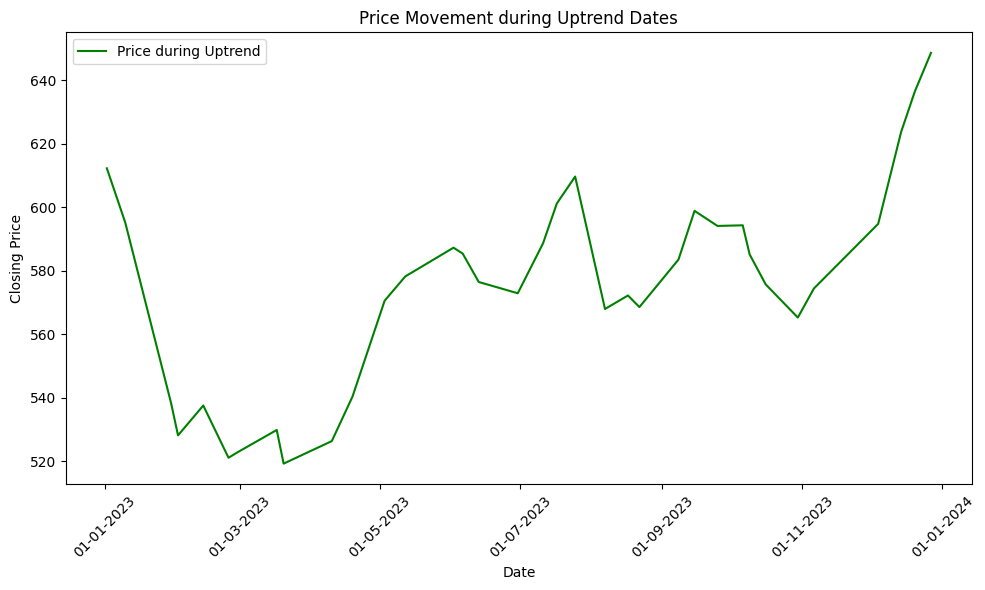

In [ ]:
#list of dates in uptrend
#no. of days of each uptrend
#line graph of clsoing price vs dates of uptrend
import nsepython
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

symbol = input()
series = "EQ"
start_date = input()
end_date = input()

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert data to DataFrame and sort by date
data = pd.DataFrame(equity_data)
data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
data = data.sort_values(by='mTIMESTAMP')

# Calculate uptrends
data['CH_PREVIOUS_CLS_PRICE'] = data['CH_CLOSING_PRICE'].shift(1)
data['trend'] = data.apply(lambda row: 'Uptrend' if row['CH_CLOSING_PRICE'] > row['CH_PREVIOUS_CLS_PRICE'] else 'Downtrend', axis=1)

# Initialize variables for tracking consecutive days and uptrend dates
consecutive_days = 1
prev_trend = None
uptrend_dates = []
uptrend_consecutive_days = []

# Loop through data to identify consecutive days in each uptrend
for index, row in data.iterrows():
    if row['trend'] == 'Uptrend':
        consecutive_days += 1
    else:
        if prev_trend == 'Uptrend':
            uptrend_dates.append((row['mTIMESTAMP'] - pd.Timedelta(days=consecutive_days)).date())
            uptrend_consecutive_days.append(consecutive_days)
        consecutive_days = 1
    prev_trend = row['trend']

# Filter data for uptrend dates
uptrend_data = data[data['mTIMESTAMP'].isin(uptrend_dates)]

# Plot Price against time during uptrend dates
plt.figure(figsize=(10, 6))
plt.plot(uptrend_data['mTIMESTAMP'], uptrend_data['CH_CLOSING_PRICE'], label='Price during Uptrend', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Price Movement during Uptrend Dates')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


{'data': [{'_id': '642835e7faf76300072ef1db', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 557.25, 'CH_TRADE_LOW_PRICE': 546.5, 'CH_OPENING_PRICE': 546.5, 'CH_CLOSING_PRICE': 553.05, 'CH_LAST_TRADED_PRICE': 552.9, 'CH_PREVIOUS_CLS_PRICE': 550.8, 'CH_TOT_TRADED_QTY': 13824475, 'CH_TOT_TRADED_VAL': 7656154646.75, 'CH_52WEEK_HIGH_PRICE': 629.55, 'CH_52WEEK_LOW_PRICE': 425, 'CH_TOTAL_TRADES': 179516, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2023-02-10', 'TIMESTAMP': '2023-02-09T18:30:00.000Z', 'createdAt': '2023-04-01T13:47:19.650Z', 'updatedAt': '2023-04-01T13:47:19.650Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 553.81, 'mTIMESTAMP': '10-Feb-2023'}, {'_id': '63e4e0621df6cc0007b3d3dd', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 552, 'CH_TRADE_LOW_PRICE': 542.8, 'CH_OPENING_PRICE': 552, 'CH_CLOSING_PRICE': 550.8, 'CH_LAST_TRADED_PRICE': 551, 'CH_PREVIOUS_CLS_PRICE': 549.75, 'CH_TOT_TRADED_QTY': 15061047,

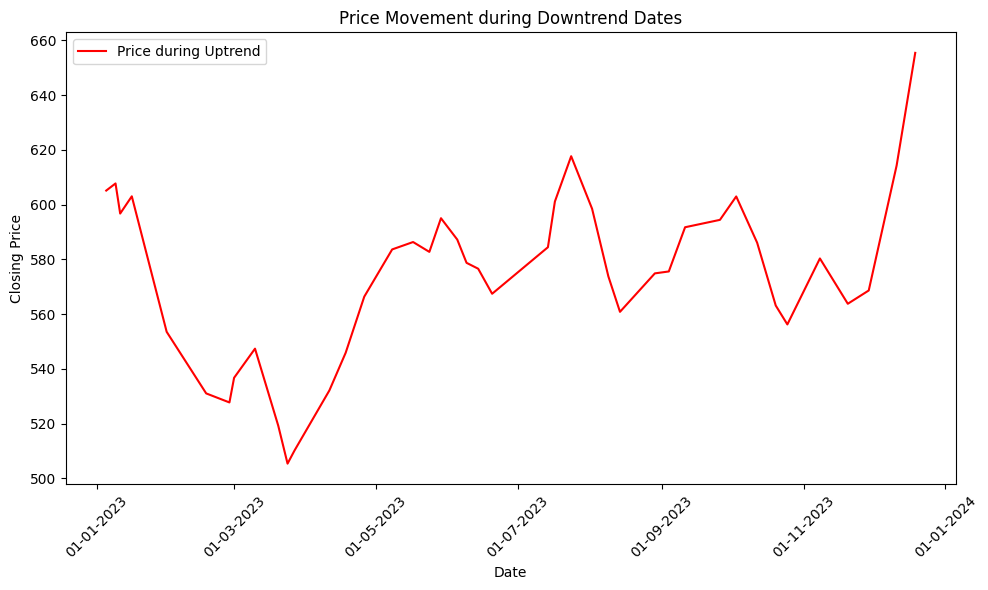

In [ ]:
#list of dates in downtrend
#no. of days of each downtrend
#line graph of clsoing price vs dates of downtrend
import nsepython
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


symbol = input()
series = "EQ"
start_date = input()
end_date = input()

# Get equity history data
equity_data = equity_history(symbol, series, start_date, end_date)

# Convert data to DataFrame and sort by date
data = pd.DataFrame(equity_data)
data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
data = data.sort_values(by='mTIMESTAMP')

# Calculate uptrends
data['CH_PREVIOUS_CLS_PRICE'] = data['CH_CLOSING_PRICE'].shift(1)
data['trend'] = data.apply(lambda row: 'Downtrend' if row['CH_CLOSING_PRICE'] < row['CH_PREVIOUS_CLS_PRICE'] else 'Uptrend', axis=1)

# Initialize variables for tracking consecutive days and uptrend dates
consecutive_days = 1
prev_trend = None
downtrend_dates = []
downtrend_consecutive_days = []

# Loop through data to identify consecutive days in each uptrend
for index, row in data.iterrows():
    if row['trend'] == 'Downtrend':
        consecutive_days += 1
    else:
        if prev_trend == 'Downtrend':
            downtrend_dates.append((row['mTIMESTAMP'] - pd.Timedelta(days=consecutive_days)).date())
            downtrend_consecutive_days.append(consecutive_days)
        consecutive_days = 1
    prev_trend = row['trend']

# Filter data for Downtrend dates
downtrend_data = data[data['mTIMESTAMP'].isin(downtrend_dates)]

df = pd.DataFrame({'Downtrend Dates': downtrend_dates, 'Consecutive Days': downtrend_consecutive_days})

# Save DataFrame to Excel
excel_file_path = 'Downtrend_Data.xlsx'
df.to_excel(excel_file_path, index=False)
print(f"Data saved to {excel_file_path}")

# Plot Price against time during downtrend dates
plt.figure(figsize=(10, 6))
plt.plot(downtrend_data['mTIMESTAMP'], downtrend_data['CH_CLOSING_PRICE'], label='Price during Uptrend', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Price Movement during Downtrend Dates')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

